In [13]:
import tensorflow as tf
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Add, Input, GlobalAveragePooling2D
from keras.models import Model
from keras.utils import plot_model
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

**Create Identity Block**

The identity block is used to add residual connections to the network without changing the dimensions of the input. It consists of two convolutional layers with BatchNormalization and ReLU activation.

In [15]:
def identity_block(x, filters):
  f1, f2 = filters

  x_shortcut = x

  # First component of the main path
  x = Conv2D(filters=f1, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # Second component of the main path
  x = Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)

  # Add shortcut connection to main path
  x = Add()([x, x_shortcut])
  x = Activation('relu')(x)

  return x

**Convolutional Block**

The convolution block is used to add residual connections to the network while changing the dimentions (for downsampling). It consists of two convolutional layers with BatchNormalization and ReLU activation, and an additional convolutional layer for the shortcut connection to match the dimensions.

In [16]:
def convolution_block(x, filters, s=2):
  f1, f2 = filters

  x_shortcut = x

  # First component of the main path
  x = Conv2D(filters=f1, kernel_size=(3, 3), strides=(s, s), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # Second component of the main path
  x = Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)

  # Shortcut path
  x_shortcut = Conv2D(filters=f2, kernel_size=(1, 1), strides=(s, s), padding='same')(x_shortcut)
  x_shortcut = BatchNormalization()(x_shortcut)

  # Add shortcut connection to main path
  x = Add()([x, x_shortcut])
  x = Activation('relu')(x)

  return x

**Create the ResNet Architecture**

The ResNet function defines the overall architecture, starting

In [17]:
def ResNet(input_shape, num_classes):
  inputs = Input(shape=input_shape)

  # Stage 1
  x = Conv2D(64, (7,7) , strides=(2, 2), padding='same')(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

  # Stage 2
  x = convolution_block(x, filters=[64, 64], s=1)
  x = identity_block(x, filters=[64, 64])

  # Stage 3
  x = convolution_block(x, filters=[128, 128], s=2)
  x = identity_block(x, filters=[128, 128])

  # Stage 4
  x = convolution_block(x, filters=[256, 256], s=2)
  x = identity_block(x, filters=[256, 256])

  # Stage 5
  x = convolution_block(x, filters=[512, 512], s=2)
  x = identity_block(x, filters=[512, 512])

  # Average pooling
  x = GlobalAveragePooling2D()(x)

  # Output layer
  outputs = Dense(num_classes, activation='softmax')(x)

  # Create model
  model = Model(inputs, outputs)

  return model

In [18]:
model = ResNet((32, 32, 3), 10)


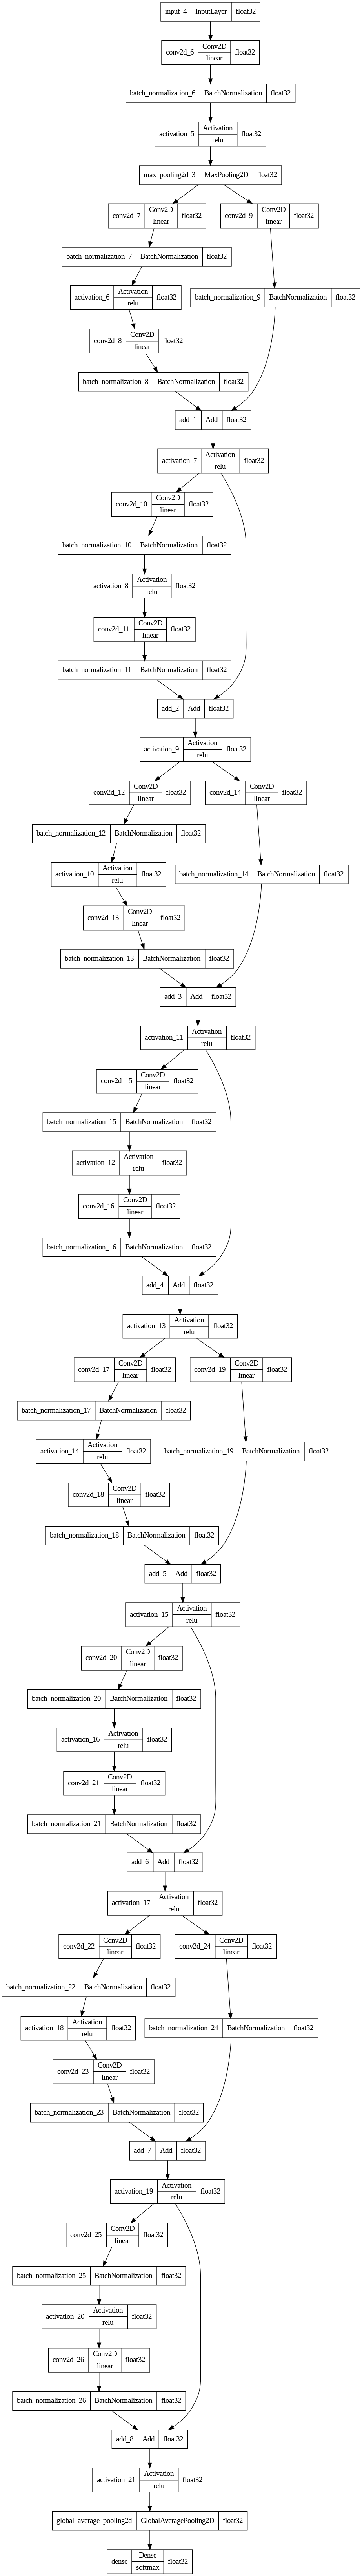

In [19]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_dtype=True)

In [ ]:
model